# Task 7 - Sales Summary using SQLite and Python
This notebook demonstrates how to:
- Create an SQLite database
- Insert sample sales data
- Query sales summary using SQL
- Visualize revenue per product using matplotlib

In [1]:
# Step 1: Create SQLite database and insert sample data
import sqlite3

# Create or connect to the database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)''')

# Insert sample data
sample_data = [
    ('Laptop', 5, 700),
    ('Headphones', 10, 50),
    ('Keyboard', 7, 30),
    ('Laptop', 2, 700),
    ('Keyboard', 3, 30)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

# Commit and close
conn.commit()
conn.close()
print("✅ Database created and sample data inserted.")

✅ Database created and sample data inserted.


 Sales Summary:
      product  total_qty  revenue
0  Headphones         20   1000.0
1    Keyboard         20    600.0
2      Laptop         14   9800.0


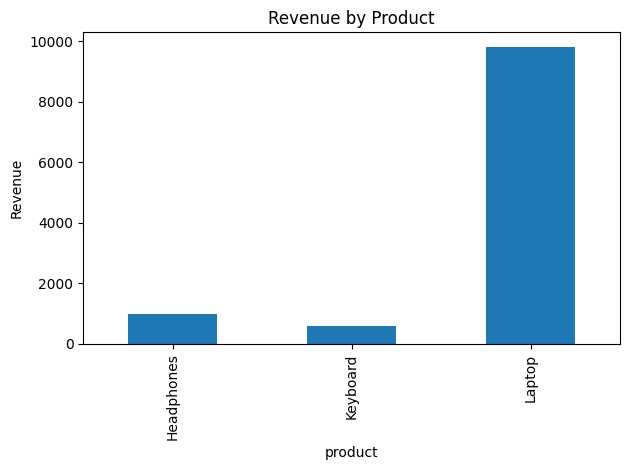

In [3]:
# Step 2: Query sales summary and visualize
import pandas as pd
import matplotlib.pyplot as plt

# Reconnect to the database
conn = sqlite3.connect('sales_data.db')

# Query for sales summary
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
'''

# Load into DataFrame
df = pd.read_sql_query(query, conn)
print(" Sales Summary:")
print(df)

# Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Close connection
conn.close()